In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from matplotlib import rc, colors, ticker
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
import astropy.units as u
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import sunpy.map
from matplotlib.patches import ConnectionPatch
from matplotlib import colors


rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder="/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms"

In [6]:
result = Fido.search(
    a.Time("2024/5/6 14:00:00", "2024/5/6 14:01:00"),
    a.Instrument.hmi,
    a.Physobs("LOS_magnetic_field"),
)

In [7]:
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str18,str6,str4,str4,str8,float64
2024-05-06 14:00:35.000,2024-05-06 14:00:36.000,SDO,HMI,6173.0 .. 6174.0,JSOC,LOS_magnetic_field,NARROW,4096,4096,FULLDISK,-0.00098


In [8]:
files = Fido.fetch(result[:, 0], path=folder + "/{file}")

Files Downloaded: 100%|██████████| 1/1 [00:25<00:00, 25.25s/file]


In [10]:
path = "/Users/lilli/Desktop/Thesis/May2024_flare/magnetograms/hmi_m_45s_2024_05_06_14_01_30_tai_magnetogram.fits"
hmi_image = sunpy.map.Map(path).rotate()

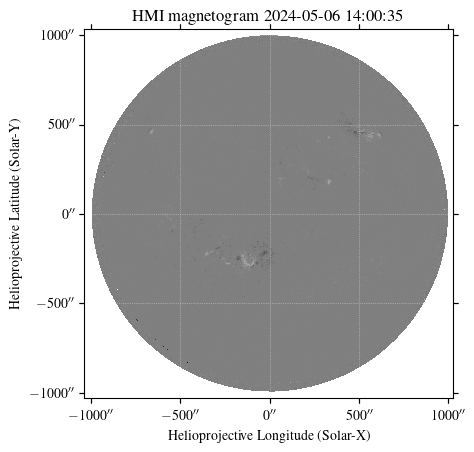

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image)
hmi_image.plot()

plt.show()

In [12]:
top_right = SkyCoord(10 * u.arcsec, -150 * u.arcsec, frame=hmi_image.coordinate_frame)
bottom_left = SkyCoord(-400 * u.arcsec, -350 * u.arcsec, frame=hmi_image.coordinate_frame)
hmi_image_cut = hmi_image.submap(bottom_left, top_right=top_right)

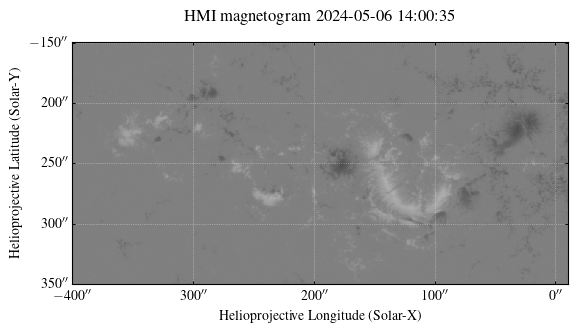

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_image_cut)
image = hmi_image_cut.plot(axes=ax)

# Make some room and put the title at the top of the figure
ax.set_title(ax.get_title(), pad=15)
ax.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_sunspots_6.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()